# Car Price Prediction 

### Imports

In [47]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, PolynomialFeatures

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Display Pipeline
from sklearn import set_config
set_config(display='diagram')

from scipy import stats
from scipy.stats import shapiro

In [2]:
#importing data
car = pd.read_csv('D:\Study\Placement\Project\car_price_prediction\cars.csv')

In [3]:
#size of the data
car.shape

(8128, 5)

In [4]:
#few sample
car.sample(5)

,brand,km_driven,fuel,owner,selling_price
877,Mahindra,120000,Diesel,Second Owner,480000
1107,Toyota,25538,Petrol,First Owner,625000
5342,Nissan,35000,Diesel,First Owner,670000
1875,Tata,80000,Diesel,First Owner,250000
7506,Mercedes-Benz,33000,Diesel,First Owner,3250000


In [5]:
car.describe(include='all')

,brand,km_driven,fuel,owner,selling_price
count,8128,8.128000e+03,8128,8128,8.128000e+03
unique,32,NaN,4,5,NaN
top,Maruti,NaN,Diesel,First Owner,NaN
freq,2448,NaN,4402,5289,NaN
mean,NaN,6.981951e+04,NaN,NaN,6.382718e+05
std,NaN,5.655055e+04,NaN,NaN,8.062534e+05
min,NaN,1.000000e+00,NaN,NaN,2.999900e+04
25%,NaN,3.500000e+04,NaN,NaN,2.549990e+05
50%,NaN,6.000000e+04,NaN,NaN,4.500000e+05
75%,NaN,9.800000e+04,NaN,NaN,6.750000e+05


<div>
    <h2><i> EDA </i></h2>
    <h2><i> Univariate Analysis:</i></h2>
        
<div/>

#### Company Counts:

<AxesSubplot:>

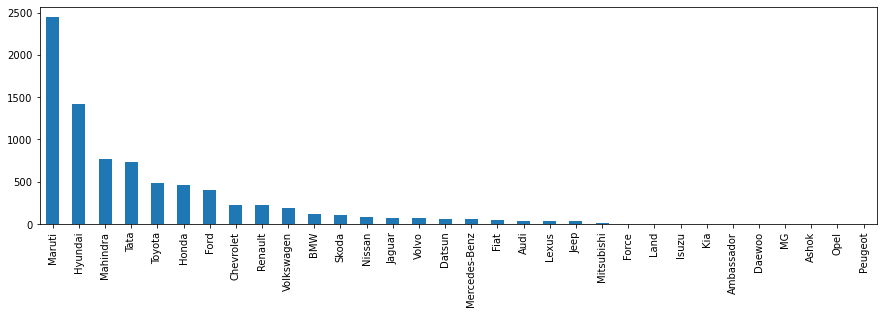

In [6]:
plt.figure(figsize=(15,4))
car['brand'].value_counts().plot(kind='bar')

<h4>Pie Chart of fuel types:</h4>

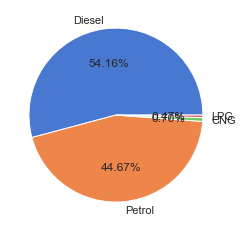

In [7]:
sns.set_theme(context = 'notebook', style = 'darkgrid', palette = 'muted')

fuel_count = car['fuel'].value_counts()
plt.pie(fuel_count,labels=fuel_count.index,autopct='%.2f%%')
plt.show()

In [8]:
#To show available styles
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


#### Owner Types:

<AxesSubplot:>

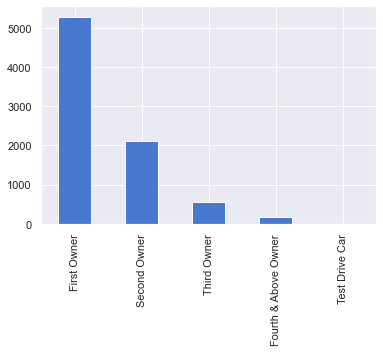

In [9]:
car['owner'].value_counts().plot(kind='bar')

#### Distribution of Kms driven

<AxesSubplot:xlabel='km_driven'>

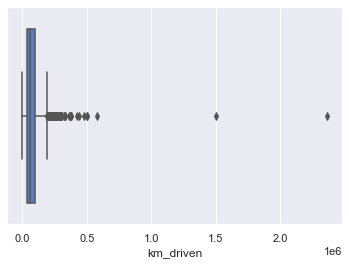

In [10]:
sns.boxplot(x='km_driven',data=car)

<h2><i> Bivariate Analysis:</i></h2>

### Brand vs Selling Price:

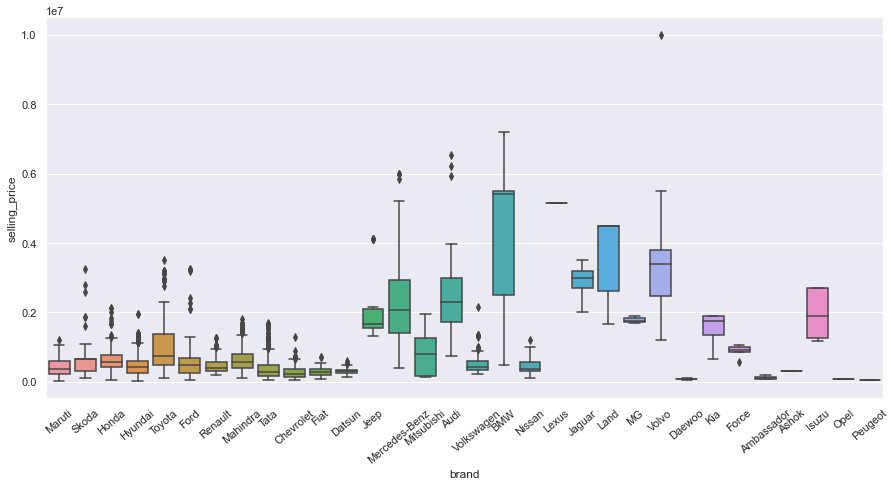

In [11]:
plt.figure(figsize=(15,7))
sns.boxplot(y='selling_price',x='brand',data=car)
# plt.tight_layout()
plt.xticks(rotation=40)
plt.show()

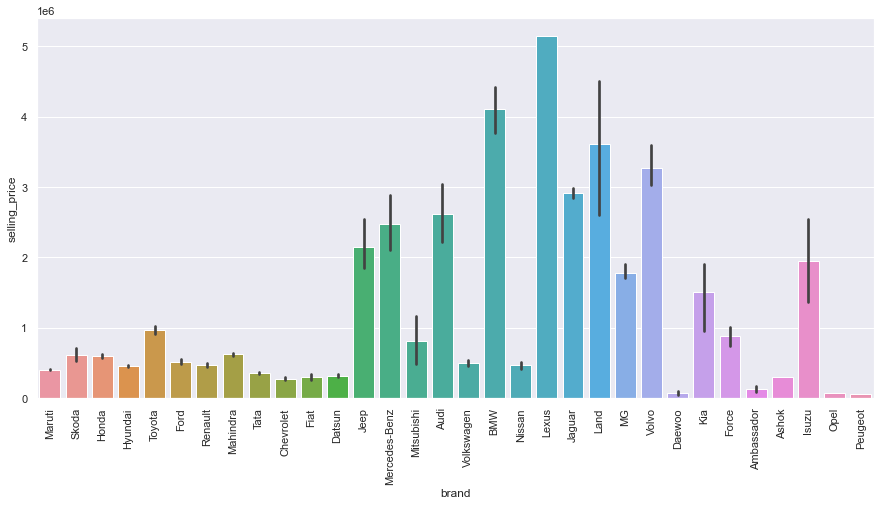

In [12]:
plt.figure(figsize=(15,7))
sns.barplot(y='selling_price',x='brand',data=car,estimator=np.mean)
# plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

### Price vs number of owners:

<AxesSubplot:xlabel='owner', ylabel='selling_price'>

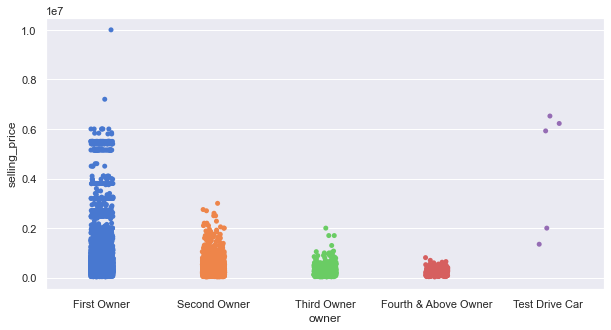

In [13]:
plt.figure(figsize=(10,5))
sns.stripplot(x='owner',y='selling_price',data=car)

<div class = 'alert alert-block alert-info'>
    <h3> Obserbation: </h3>
    <ul>
        <li> Most of the Cars are from First Owner, it has been sold with higher amount than the other groups. </li>
        <li> Higher <b> the number of owners </b> will be, lesser the <b> selling price </b> will be. </li>
    </ul>
</div>

### KM driven vs selling price:

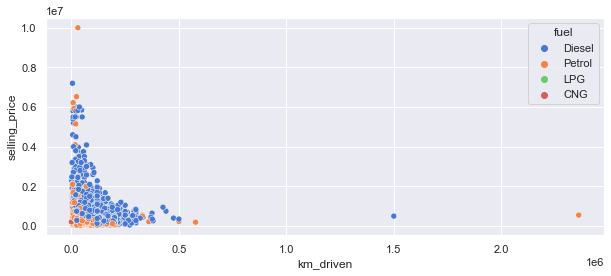

In [14]:
plt.figure(figsize=(10,4))
sns.scatterplot(x='km_driven',y='selling_price',data=car,hue='fuel')
plt.show()

In [15]:
comp = car['brand'].value_counts()
comp = comp[comp>np.quantile(comp.values,q=.4)]

In [16]:
comp_names = comp.index

In [17]:
car['brand'].nunique()

32

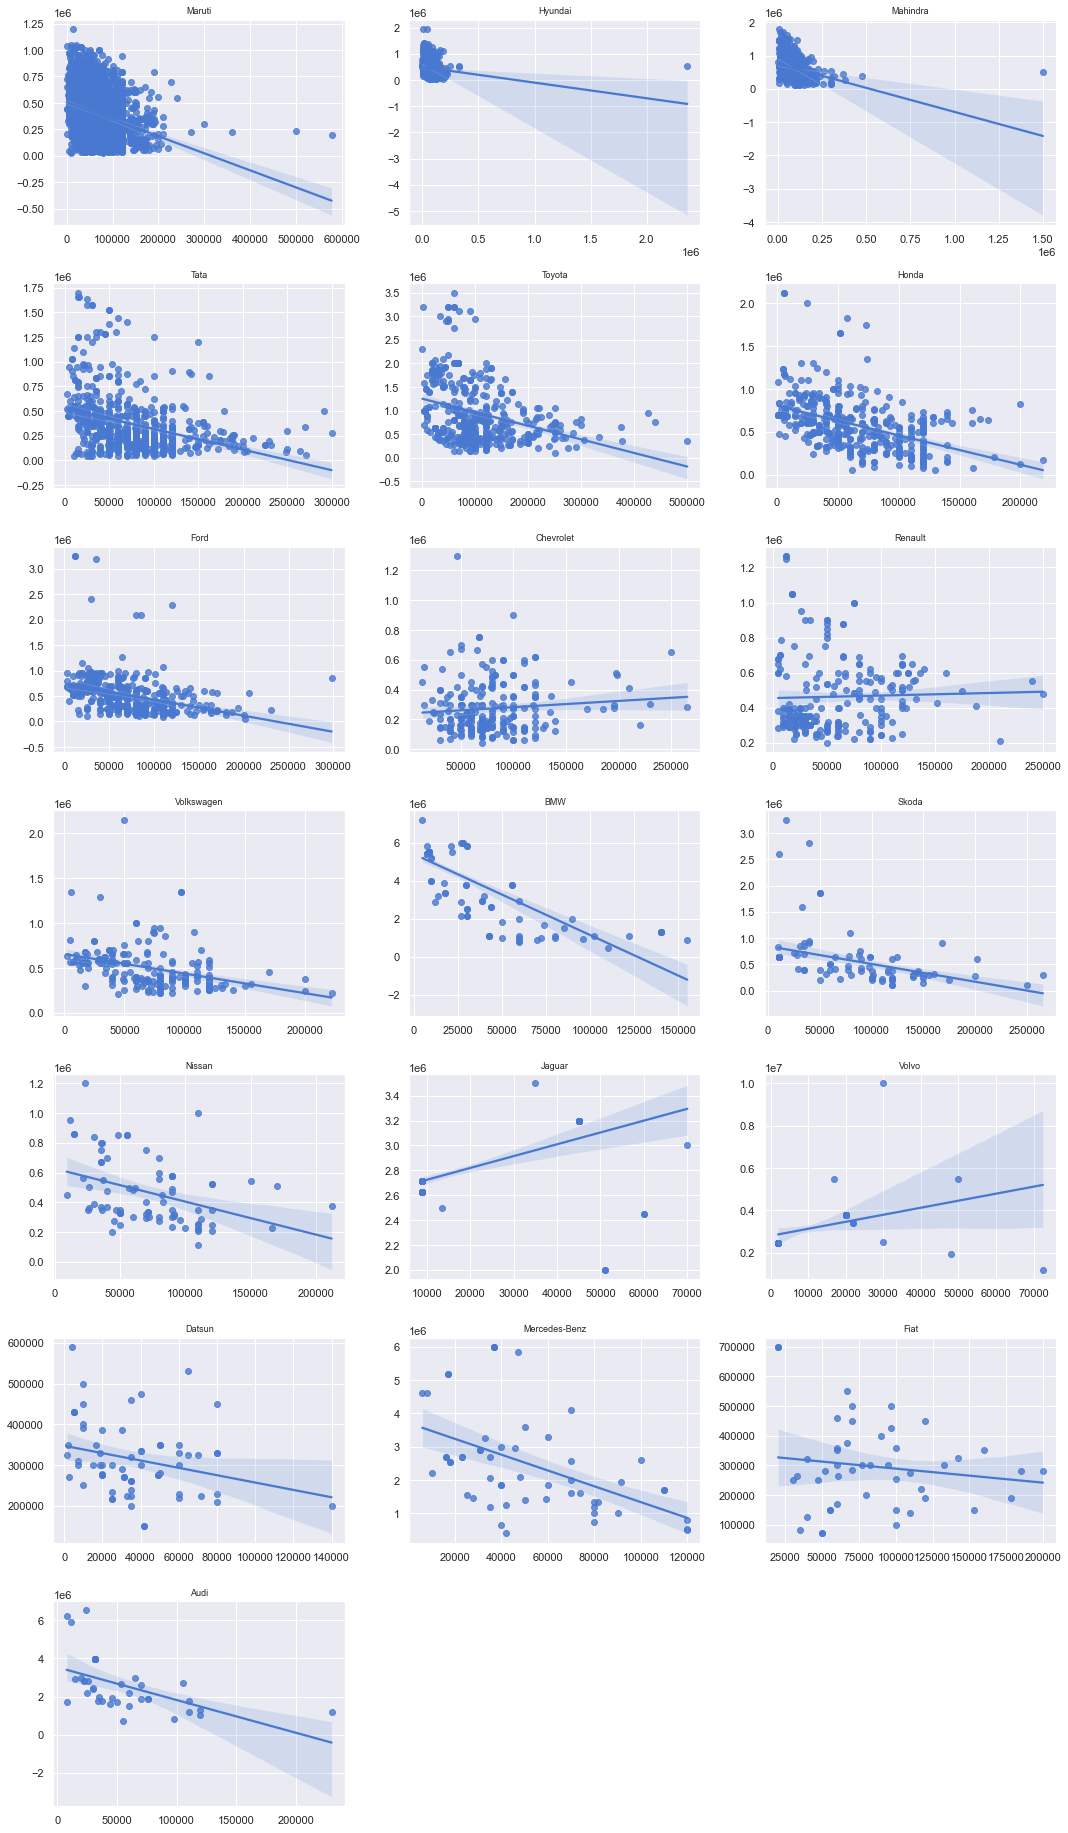

In [18]:
#please remember to give () after unique()

plt.figure(figsize=(15,40))
gs = gridspec.GridSpec(11, 3)
for i, c in enumerate(comp_names):
    ax = plt.subplot(gs[i])
    sns.regplot(x='km_driven',y='selling_price',data=car[car.brand==c])
    ax.set_title(c,size=9)
    ax.set_xlabel('')
    ax.set_ylabel('')
    plt.tight_layout()

plt.show()

<div class = 'alert alert-block alert-info'>
    <h3> Obserbation: </h3>
    <p> It's not fair to compare KMs driven and selling price including all company. So I have plotted km_driven vs selling_price grouped on differnt brands.
    </p>
    <ul>
        <li> Usually the more the distance the car is driven, the lesser value it gets in the market. </li>
        <li> The price of used cards fall linearly. </li>
    </ul>
</div>

### Fuel type vs selling price:

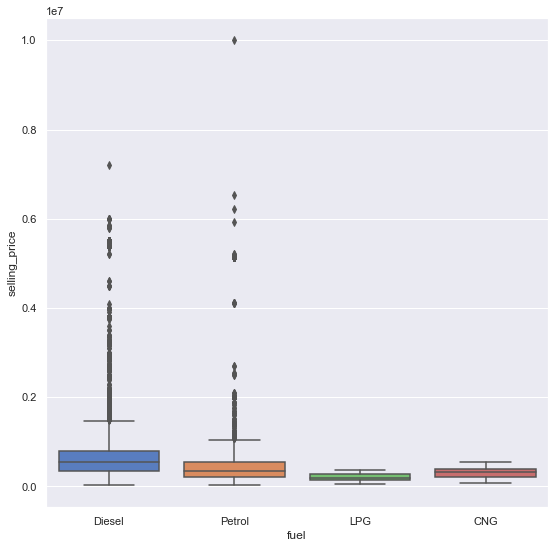

In [19]:
plt.figure(figsize=(9,9))
sns.boxplot(x='fuel',y='selling_price',data=car)
plt.show()

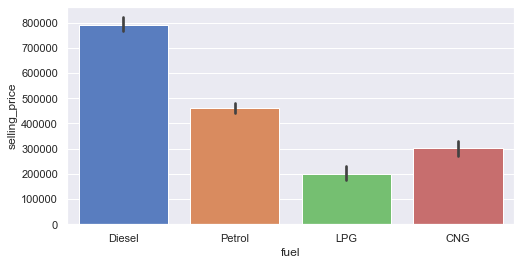

In [20]:
plt.figure(figsize=(8,4))
sns.barplot(x='fuel',y='selling_price',data=car,estimator=np.mean)
plt.show()

<div class = 'alert alert-block alert-info'>
    <h3> Obserbation: </h3>
    <ul>
        <li> Car with Diest engine can be sold with higher values. </li>
        <li> LPG cars are cheaper in used market. </li>
    </ul>
</div>

### KM driven vs owner (for fun):

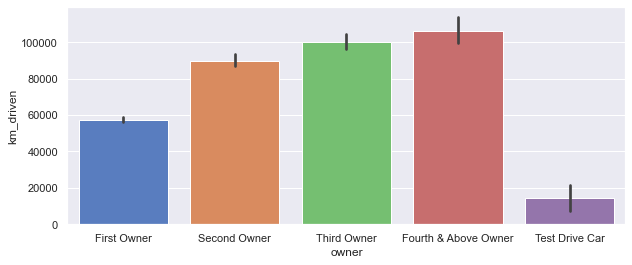

In [21]:
plt.figure(figsize=(10,4))
sns.barplot(x = 'owner', y = 'km_driven', data = car)
plt.show()

### Correlation between the explanatory variables

In [58]:
car.corr()

,km_driven,selling_price
km_driven,1.000000,-0.225534
selling_price,-0.225534,1.000000


## Towards making model: (preprocessing)

1. Encoding
1. scaling
1. multicolinearity check
1. normality distribution check
1. residual analysis
1. we would try by dropping column owner

In [22]:
car.sample(5)

,brand,km_driven,fuel,owner,selling_price
1852,Maruti,35000,Petrol,Fourth & Above Owner,45000
7928,Maruti,30154,Diesel,First Owner,630000
2941,Maruti,100000,Petrol,First Owner,310000
4603,Hyundai,90000,Diesel,Second Owner,380000
554,Hyundai,32000,Petrol,First Owner,580000


In [23]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   brand          8128 non-null   object
 1   km_driven      8128 non-null   int64 
 2   fuel           8128 non-null   object
 3   owner          8128 non-null   object
 4   selling_price  8128 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 317.6+ KB


### Train Test split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(car.drop(columns=['selling_price']),car['selling_price'],\
                                                    test_size=.2)

In [25]:
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((6502, 4), (1626, 4), (6502,), (1626,))

### Encoding,Standardization

In [26]:
X_train

,brand,km_driven,fuel,owner
698,Maruti,40000,Diesel,First Owner
2502,Hyundai,40000,Petrol,First Owner
7708,Honda,7032,Petrol,First Owner
3076,Maruti,25000,Petrol,First Owner
3766,Toyota,110000,Diesel,First Owner
...,...,...,...,...
2082,Tata,110000,Diesel,Second Owner
695,Maruti,150000,Petrol,Second Owner
7427,Chevrolet,120000,Diesel,First Owner
6221,Hyundai,26442,Petrol,First Owner


### ColumnTransforming

In [27]:
trf = ColumnTransformer([
    ('tf1',OneHotEncoder(drop='first',sparse=False,handle_unknown='ignore'),['brand','fuel']),
    ('tf2',OrdinalEncoder(categories=[['Test Drive Car','First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner']]),['owner']),
    ('tf4',PolynomialFeatures(degree=2),['km_driven']),
    ('tf3',StandardScaler(),['km_driven'])],
remainder='passthrough')

#### Checking if transformer is working correctly

In [28]:
pd.DataFrame(trf.fit_transform(X_train)).loc[:,33]

0       0.0
1       1.0
2       1.0
3       1.0
4       0.0
       ... 
6497    0.0
6498    1.0
6499    0.0
6500    1.0
6501    1.0
Name: 33, Length: 6502, dtype: float64

In [59]:
X_train

,brand,km_driven,fuel,owner
698,Maruti,40000,Diesel,First Owner
2502,Hyundai,40000,Petrol,First Owner
7708,Honda,7032,Petrol,First Owner
3076,Maruti,25000,Petrol,First Owner
3766,Toyota,110000,Diesel,First Owner
...,...,...,...,...
2082,Tata,110000,Diesel,Second Owner
695,Maruti,150000,Petrol,Second Owner
7427,Chevrolet,120000,Diesel,First Owner
6221,Hyundai,26442,Petrol,First Owner


In [61]:
X_transformed = pd.DataFrame(trf.fit_transform(X_train))

### Making PipeLine

In [30]:
lr = LinearRegression(n_jobs=-1)

In [31]:
pipe = make_pipeline(trf,lr)

In [32]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tf1',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  ['brand', 'fuel']),
                                                 ('tf2',
                                                  OrdinalEncoder(categories=[['Test '
                                                                              'Drive '
                                                                              'Car',
                                                                              'First '
                                                                              'Owner',
                                                                              'Second '
                                                                              'Owner',
                                                                              'Third '
                                                                              'Owner',
                                                                              'Fourth '
                                                                              '& '
                                                                              'Above '
                                                                              'Owner']]),
                                                  ['owner']),
                                                 ('tf4', PolynomialFeatures(),
                                                  ['km_driven']),
                                                 ('tf3', StandardScaler(),
                                                  ['km_driven'])])),
                ('linearregression', LinearRegression(n_jobs=-1))])

In [33]:
lst = [[r2_score(y_test,pipe.predict(X_test)),r2_score(y_train,pipe.predict(X_train))]]
pd.DataFrame(lst,columns=['Train','Test'],index = ['R2-Score'])

,Train,Test
R2-Score,0.780403,0.767327


### Residual Behaviour

<AxesSubplot:ylabel='selling_price'>

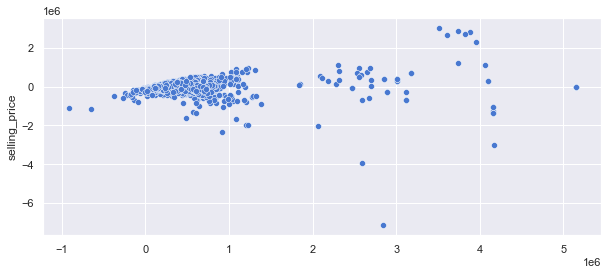

In [36]:
plt.figure(figsize=(10,4))
y_pred = pipe.predict(X_test)
res = (y_pred - y_test)
sns.scatterplot(x=y_pred,y=res)

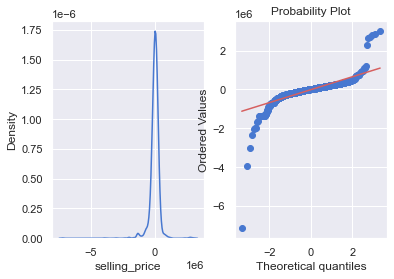

In [55]:
fig,(ax1,ax2) = plt.subplots(1,2)

sns.kdeplot(res,ax=ax1)
stats.probplot(res,plot=ax2)
plt.show()

In [52]:
s, p_val = shapiro(res)
print(f'The p_value of Shapiro Wilk normality test is : {p_val}')

The p_value of Shapiro Wilk normality test is : 0.0


<div class = 'alert alert-block alert-info'>
    <h3> Obserbation: </h3>
    <ul>
        <li> Heteroskedasticity is present. </li>
        <li> Residual doesn't follow normality. </li>
    </ul>
</div>

### Coefficient of the eqn that's has been fitted 

In [37]:
coeff = pipe.named_steps.linearregression.coef_
coeff

array([ 4.32737259e+05,  2.23373857e+06,  3.62068623e+06,  1.39809009e+05,
       -6.46043684e+04,  1.09282684e+05,  1.10942152e+05,  5.27943502e+05,
        2.98646875e+05,  4.27980096e+05,  2.99273198e+05,  1.51892813e+06,
        2.47089832e+06,  1.79306726e+06,  9.71738342e+05,  3.20153069e+06,
        4.88979790e+06,  1.57864700e+06,  3.80133277e+05,  2.47040334e+05,
        2.21015367e+06,  7.48358252e+05,  2.67058174e+05,  3.05121733e+05,
        5.18085026e+04,  2.29900762e+05,  4.04230792e+05,  1.59339966e+05,
        8.22256069e+05,  2.83885217e+05,  2.61754895e+06,  2.72142037e+05,
        1.70741311e+04,  2.98153955e+04, -1.14119549e+05, -9.06875357e-08,
       -3.20480477e+00,  1.42725185e-06,  1.86991664e-02])

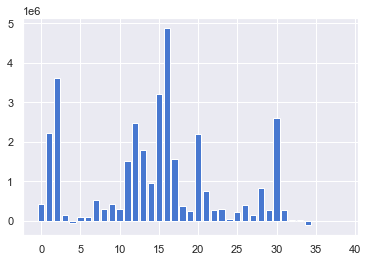

In [39]:
plt.bar(range(len(coeff)),coeff)
plt.show()

### Random Forest Regression 

In [92]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 50, random_state = 0,max_depth=15)
  
# fit the regressor with x and y data
regressor.fit(X_transformed, y_train) 

RandomForestRegressor(max_depth=15, n_estimators=50, random_state=0)

In [93]:
y_pred_rf = regressor.predict(trf.transform(X_test))

In [94]:
lst = [[r2_score(y_test,pipe.predict(X_test)),r2_score(y_train,pipe.predict(X_train))],
       [r2_score(y_train,regressor.predict(X_transformed)),r2_score(y_test,y_pred_rf)]]
pd.DataFrame(lst,columns=['Train','Test'],index = ['Linear Regression','Random Forest'])

,Train,Test
Linear Regression,0.780403,0.767327
Random Forest,0.915300,0.864841
